In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


In [2]:
diabetes=pd.read_csv('diabetes.csv')

In [4]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
train_data=diabetes[2:602]
test_data=diabetes[602:769]
train_dataLen=len(train_data)

<Axes: >

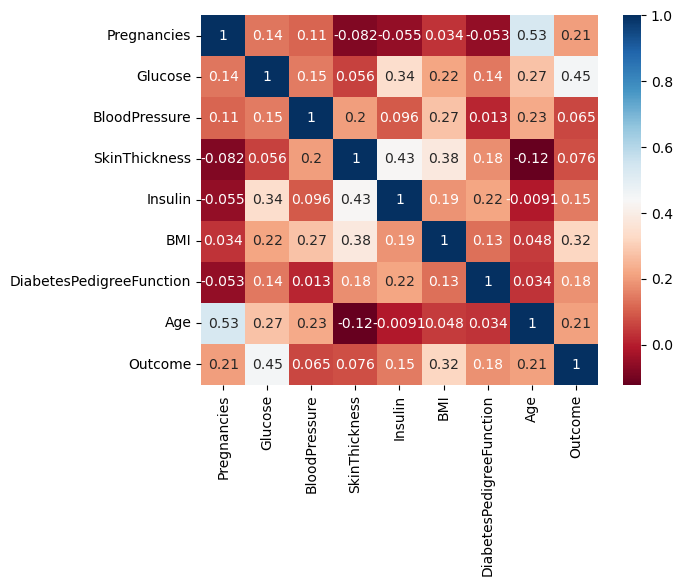

In [4]:
train_corr=train_data.corr()
sns.heatmap(train_corr,cmap='RdBu',annot=True)

In [9]:
train_data=train_data[['Pregnancies','Glucose','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']]
train_data
test_data=test_data[['Pregnancies','Glucose','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']]
test_data

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
602,1,124,0,27.8,0.100,30,0
603,7,150,126,35.2,0.692,54,1
604,4,183,0,28.4,0.212,36,1
605,1,124,0,35.8,0.514,21,0
606,1,181,293,40.0,1.258,22,1
...,...,...,...,...,...,...,...
763,10,101,180,32.9,0.171,63,0
764,2,122,0,36.8,0.340,27,0
765,5,121,112,26.2,0.245,30,0
766,1,126,0,30.1,0.349,47,1


In [10]:
train_data

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183,0,23.3,0.672,32,1
3,1,89,94,28.1,0.167,21,0
4,0,137,168,43.1,2.288,33,1
5,5,116,0,25.6,0.201,30,0
6,3,78,88,31.0,0.248,26,1
...,...,...,...,...,...,...,...
597,1,89,25,27.8,0.559,21,0
598,1,173,0,36.8,0.088,38,1
599,1,109,120,23.1,0.407,26,0
600,1,108,0,27.1,0.400,24,0


In [13]:
xtrain=train_data.drop(columns=['Outcome'])
ytrain=train_data['Outcome']
xtest=test_data.drop(columns=['Outcome'])
ytest=test_data['Outcome']

In [14]:
scaler=StandardScaler()
scaler.fit(xtrain)

StandardScaler()

In [15]:
xtrain=scaler.transform(xtrain)
xtrain

array([[ 1.24434157,  1.92996053, -0.68327145, -1.07248467,  0.56827146,
        -0.10423463],
       [-0.83948403, -0.95362996,  0.12433401, -0.47316847, -0.92965158,
        -1.03641425],
       [-1.1371734 ,  0.51884178,  0.76010853,  1.39969467,  5.3616252 ,
        -0.01949103],
       ...,
       [-0.83948403, -0.34010007,  0.34771425, -1.09745618, -0.21776736,
        -0.61269624],
       [-0.83948403, -0.37077656, -0.68327145, -0.59802601, -0.23853065,
        -0.78218345],
       [ 0.64896283, -0.7388945 , -0.68327145, -1.02254165, -0.86142934,
        -0.44320904]])

In [16]:
xtest=scaler.transform(xtest)
xtest

array([[-8.39484029e-01,  1.20047349e-01, -6.83271452e-01,
        -5.10625728e-01, -1.12838592e+00, -2.73721835e-01],
       [ 9.46652202e-01,  9.17636207e-01,  3.99263531e-01,
         4.13320084e-01,  6.27595149e-01,  1.76012462e+00],
       [ 5.35840869e-02,  1.92996053e+00, -6.83271452e-01,
        -4.35711203e-01, -7.96173287e-01,  2.34739778e-01],
       [-8.39484029e-01,  1.20047349e-01, -6.83271452e-01,
         4.88234609e-01,  9.96143541e-02, -1.03641425e+00],
       [-8.39484029e-01,  1.86860754e+00,  1.83405196e+00,
         1.01263629e+00,  2.30645543e+00, -9.51670652e-01],
       [-8.39484029e-01, -8.61600477e-01, -3.31018005e-01,
        -1.54694333e+00,  4.69645838e-03, -6.97439846e-01],
       [-1.13717340e+00,  9.78989196e-01,  1.65362946e+00,
         1.19992260e+00, -6.24134601e-01, -5.27952641e-01],
       [-8.39484029e-01, -2.78747080e-01,  8.80390190e-01,
        -9.85084389e-01, -1.01567092e+00, -8.66927050e-01],
       [-2.44105285e-01, -4.32129553e-01,  6.741

In [17]:
clf=KNeighborsClassifier()
params={'n_neighbors':[3,5,7,9,11,13,15,17,19]}
gs=GridSearchCV(clf,param_grid=params,cv=5,scoring='roc_auc')

In [18]:
gs.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19]},
             scoring='roc_auc')

In [19]:
print(gs.best_score_)
print(gs.best_estimator_)

0.8103652882056711
KNeighborsClassifier(n_neighbors=19)


In [21]:
pred=gs.predict(xtest)
pred

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [22]:
print(accuracy_score(ytest,pred))

0.7951807228915663
